## Importing Scraped SUV Data

In [1]:
#Import Libraries
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Retrieve Scraped CSV file (see Sydney_SUV_Scraping for source file)
salesdata=pd.read_csv(r'C:\Users\kpali\Desktop\Python_Projects\CarSales_SUV\Sydney_SUV_Scraping/suvdata.csv')
print(salesdata.shape)
salesdata.head()

(1015, 5)


,Title,Price,Odometer,Transmission,Engine
0,2018 Toyota RAV4 GXL Auto 2WD,"$41,800*","23,228 km",Automatic,4cyl 2.0L Petrol
1,2018 Audi SQ5 Auto quattro MY18,"$74,500*","72,545 km",Automatic,6cyl 3.0L Turbo Petrol
2,2013 Audi Q5 TDI Auto quattro MY14,"$22,000*","175,500 km",Automatic,6cyl 3.0L Turbo Diesel
3,2002 Honda CR-V Sport Auto 4WD MY02,"$5,100*","173,000 km",Automatic,4cyl 2.4L Petrol
4,2016 Honda CR-V VTi-L Auto MY17,"$28,850*","55,923 km",Automatic,4cyl 2.0L Petrol


## Data Cleaning

In [3]:
#Creating Column representing Year
salesdata['Year']=[list(x.split(' '))[0] for x in salesdata['Title']]

In [4]:
#SUV Brands
salesdata['Brand']=[list(x.split(' '))[1] for x in salesdata['Title']]
salesdata['Brand'].unique()

array(['Toyota', 'Audi', 'Honda', 'MG', 'Kia', 'Hyundai', 'Ford', 'Lexus',
       'Mercedes-Benz', 'Renault', 'SKODA', 'BMW', 'Nissan', 'Mitsubishi',
       'Land', 'Jeep', 'Subaru', 'Mazda', 'Volkswagen', 'Porsche',
       'Holden', 'Volvo', 'Alfa', 'Suzuki', 'Fiat', 'Haval', 'Maserati',
       'Tesla', 'Isuzu', 'Jaguar', 'LDV', 'MINI', 'SsangYong', 'Dodge',
       'Peugeot', 'Aston'], dtype=object)

In [5]:
#Replace Land with Land Rover
salesdata['Brand'].replace('Land','Land Rover',inplace=True)

In [6]:
#Retreive Model Type from Title
salesdata['Modellst']=[list(x.split(' '))[2:] for x in salesdata['Title']]
salesdata['Modellst']=[x[:] if x[0]!='Rover' else x[1:] for x in salesdata['Modellst']]
salesdata['Model']=[' '.join(x) for x in salesdata['Modellst']]
salesdata.drop(columns='Modellst',inplace=True)

In [7]:
#Null Odometers
Nullodom=salesdata[salesdata['Odometer'].isnull()]
Nullodom['Year'].value_counts()

2021    77
2020     4
Name: Year, dtype: int64

In [8]:
#Only recent models with no odometers so assume they are 0
salesdata['Odometer'].fillna(0,inplace=True)

In [9]:
#Reformating Odometer Values
salesdata.dtypes['Odometer']

dtype('O')

In [10]:
#Eliminating ',' and 'km' from odometer figures
salesdata['Odometer']=salesdata['Odometer'].astype(str)
salesdata['Odometer']=salesdata['Odometer'].map(lambda x: x.strip('km'))
salesdata['Odometer']=salesdata['Odometer'].map(lambda x: x.replace(',',''))
salesdata['Odometer']=salesdata['Odometer'].astype(int)

In [11]:
#Formatting Price Figures
salesdata['Price']=salesdata['Price'].astype(str)
salesdata['Price']=salesdata['Price'].map(lambda x: x.strip('$'))
salesdata['Price']=salesdata['Price'].map(lambda x: x.replace('*',''))
salesdata['Price']=salesdata['Price'].map(lambda x: x.replace(',',''))
salesdata['Price'].unique()

array(['41800 ', '74500 ', '22000 ', '5100 ', '28850 ', '21990 ',
       '27010 ', '34290 ', '55990 ', '40990 ', '69880 ', '179900 ',
       '40835 ', '95888 ', '39540 ', '37900 ', '36990 ', '129555 ',
       '67222 ', '27990 ', '62880 ', '17888 ', '99990 ', '66990 ',
       '52990 ', '33789 ', '89800 ', '35990 ', '48500 ', '26888 ',
       '76988 ', '44888 ', '24900 ', '42990 ', '31990 ', '47534 ',
       '29800 ', '29990 ', '40490 ', '84800 ', '45990 ', '25880 ',
       '65777 ', '34800 ', '41880 ', '27888 ', '49888 ', '119990 ',
       '79800 ', '48490 ', '46990 ', '56990 ', '119900 ', '34555 ',
       '35390 ', '29999 ', '24888 ', '47690 ', '94800 ', '89850 ',
       '31900 ', '21900 ', '42900 ', '26789 ', '76555 ', '58900 ',
       '47990 ', '51880 ', '23990 ', '74900 ', '46952 ', '75372 ',
       '35888 ', '40999 ', '99985 ', '79850 ', '99777 ', '25990 ',
       '35800 ', '57500 ', '41840 ', '21888 ', '299900 ', '66880 ',
       '49990 ', '47900 ', '44840 ', '26990 ', '43990 ', '

In [12]:
#Drop Data Entry enquire for price
salesdata=salesdata[salesdata['Price']!='Enquire for price ']
salesdata['Price']=salesdata['Price'].astype(int)

In [13]:
#Title Column no longer required
salesdata.drop(columns='Title',inplace=True)

In [14]:
salesdata.head()

,Price,Odometer,Transmission,Engine,Year,Brand,Model
0,41800,23228,Automatic,4cyl 2.0L Petrol,2018,Toyota,RAV4 GXL Auto 2WD
1,74500,72545,Automatic,6cyl 3.0L Turbo Petrol,2018,Audi,SQ5 Auto quattro MY18
2,22000,175500,Automatic,6cyl 3.0L Turbo Diesel,2013,Audi,Q5 TDI Auto quattro MY14
3,5100,173000,Automatic,4cyl 2.4L Petrol,2002,Honda,CR-V Sport Auto 4WD MY02
4,28850,55923,Automatic,4cyl 2.0L Petrol,2016,Honda,CR-V VTi-L Auto MY17


In [15]:
#Renaming and Rearranging columns in Python
salesdata.rename(columns={'Price':'Price($)','Odometer':'Odometer(km)'},inplace=True)
salesdata=salesdata[['Brand','Year','Model','Price($)','Odometer(km)','Transmission','Engine']]
salesdata.head()

,Brand,Year,Model,Price($),Odometer(km),Transmission,Engine
0,Toyota,2018,RAV4 GXL Auto 2WD,41800,23228,Automatic,4cyl 2.0L Petrol
1,Audi,2018,SQ5 Auto quattro MY18,74500,72545,Automatic,6cyl 3.0L Turbo Petrol
2,Audi,2013,Q5 TDI Auto quattro MY14,22000,175500,Automatic,6cyl 3.0L Turbo Diesel
3,Honda,2002,CR-V Sport Auto 4WD MY02,5100,173000,Automatic,4cyl 2.4L Petrol
4,Honda,2016,CR-V VTi-L Auto MY17,28850,55923,Automatic,4cyl 2.0L Petrol


In [16]:
#Price and Year Dtypes
salesdata[['Price($)','Year']].dtypes

Price($)     int32
Year        object
dtype: object

In [17]:
#Year to int
salesdata['Year']=salesdata['Year'].astype(int)

## Exploratory Data Analysis

C:\Users\kpali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'SUV Price Distribution'}, xlabel='Price($)', ylabel='Density'>

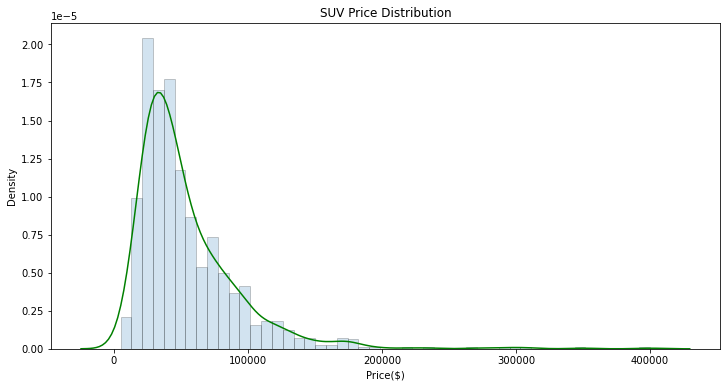

In [18]:
#Distribution of SUV Prices
plt.figure(figsize=(12,6))
plt.title('SUV Price Distribution')
sns.distplot(salesdata['Price($)'],hist_kws={'edgecolor':'black','alpha':0.2},kde_kws={'color':'Green'})

In [19]:
#Summary of Prices
salesdata['Price($)'].describe()

count      1015.000000
mean      54335.142857
std       39292.460091
min        5000.000000
25%       28888.000000
50%       42560.000000
75%       69638.500000
max      399990.000000
Name: Price($), dtype: float64

<AxesSubplot:title={'center':'SUV Prices by Brand'}, xlabel='Brand', ylabel='Price($)'>

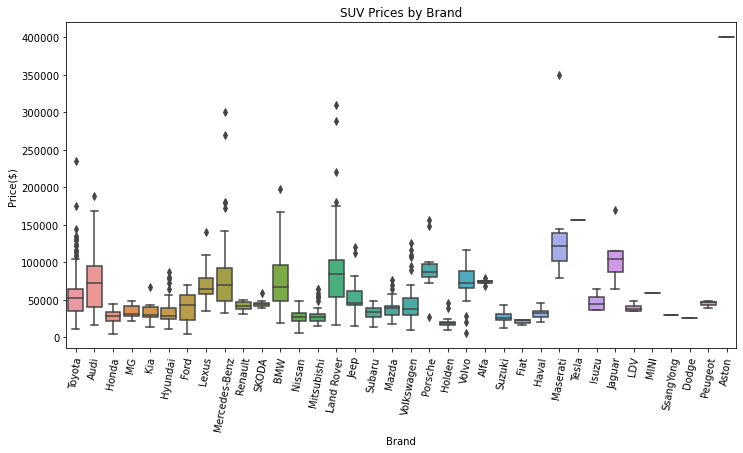

In [20]:
#Price Distribution by Car Brand
plt.figure(figsize=(12,6))
plt.xticks(rotation=80)
plt.title('SUV Prices by Brand')
sns.boxplot(x='Brand',y='Price($)',data=salesdata)

In [21]:
# Most Common Brands
from collections import Counter
common_brands=salesdata['Brand'].values.tolist()
Counter(common_brands).most_common(15)

[('Toyota', 127),
 ('Audi', 81),
 ('Nissan', 74),
 ('BMW', 70),
 ('Mazda', 64),
 ('Hyundai', 59),
 ('Land Rover', 55),
 ('Volkswagen', 54),
 ('Mercedes-Benz', 52),
 ('Mitsubishi', 47),
 ('Jeep', 40),
 ('Subaru', 40),
 ('Lexus', 34),
 ('Volvo', 32),
 ('Suzuki', 21)]

<ipython-input-22-ded8439e20c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_odom['Odometer(km)']=positive_odom['Odometer(km)'].astype(int)


(array([1.20215306e-05, 7.51345662e-06, 6.94994737e-06, 4.13240114e-06,
        1.61539317e-06, 1.01431664e-06, 7.51345662e-07, 3.75672831e-07,
        2.62970982e-07, 1.12701849e-07, 1.12701849e-07, 3.75672831e-08,
        7.51345662e-08, 0.00000000e+00, 3.75672831e-08, 3.75672831e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.75672831e-08]),
 array([2.000000e+00, 2.850190e+04, 5.700180e+04, 8.550170e+04,
        1.140016e+05, 1.425015e+05, 1.710014e+05, 1.995013e+05,
        2.280012e+05, 2.565011e+05, 2.850010e+05, 3.135009e+05,
        3.420008e+05, 3.705007e+05, 3.990006e+05, 4.275005e+05,
        4.560004e+05, 4.845003e+05, 5.130002e+05, 5.415001e+05,
        5.700000e+05]),
 <BarContainer object of 20 artists>)

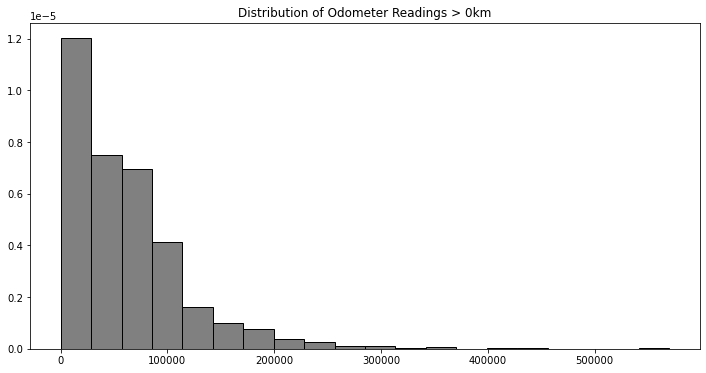

In [22]:
#Distribution of Odometer Readings >0
positive_odom=salesdata[salesdata['Odometer(km)']>0]
positive_odom['Odometer(km)']=positive_odom['Odometer(km)'].astype(int)
plt.figure(figsize=(12,6))
plt.title('Distribution of Odometer Readings > 0km')
plt.hist(positive_odom['Odometer(km)'],bins=20,density=True,color='Grey',edgecolor='Black')

In [23]:
#Summary of Odometer Readings
salesdata['Odometer(km)'].describe()

count      1015.000000
mean      56099.275862
std       60282.603898
min           0.000000
25%        7844.000000
50%       45716.000000
75%       80738.500000
max      570000.000000
Name: Odometer(km), dtype: float64

In [24]:
#Correlation Between Columns
salesdata.corr()

,Year,Price($),Odometer(km)
Year,1.000000,0.355938,-0.856830
Price($),0.355938,1.000000,-0.326029
Odometer(km),-0.856830,-0.326029,1.000000


R Squared (-0.32602944657174227, 1.452285969204919e-26)


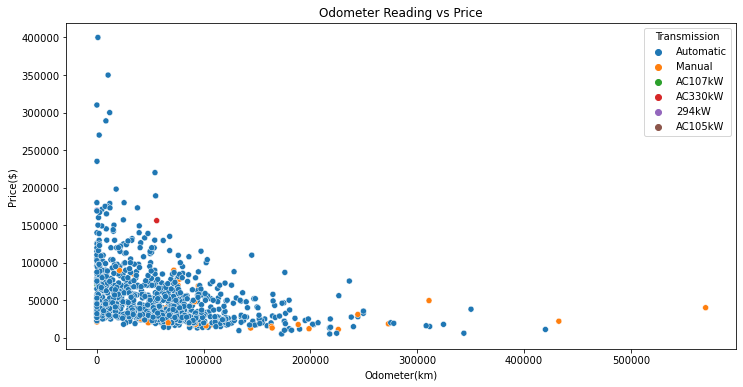

In [25]:
#Relationship between Odometer Readings and Price
plt.figure(figsize=(12,6))
plt.title('Odometer Reading vs Price')
sns.scatterplot(x='Odometer(km)',y='Price($)',data=salesdata,hue='Transmission')
print('R Squared', st.pearsonr(salesdata['Odometer(km)'],salesdata['Price($)']))

<AxesSubplot:title={'center':'Average Car Price per Year'}, xlabel='Year', ylabel='Price($)'>

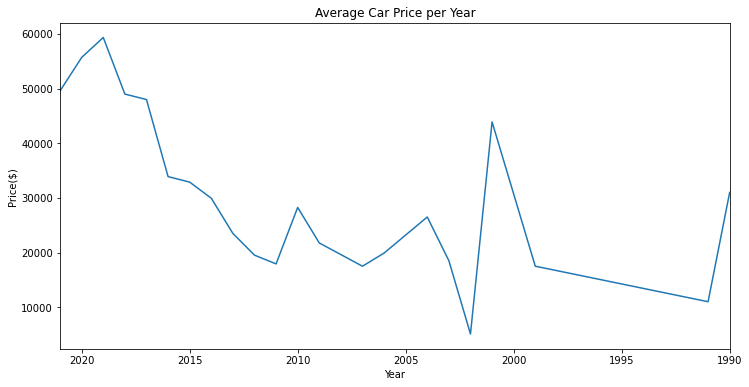

In [26]:
#Median Price by Year
plt.figure(figsize=(12,6))
plt.title('Average Car Price per Year')
plt.xlim(salesdata['Year'].max(),salesdata['Year'].min())
sns.lineplot(x='Year',y='Price($)',data=salesdata,estimator='median',ci=None)

In [27]:
#Price Quantiles
price_quantiles=salesdata['Price($)'].quantile([0.25,0.5,0.75])

In [28]:
#Brands in Each Quartile
brand_1=[]
brand_2=[]
brand_3=[]
brand_4=[]

brands=salesdata['Brand'].unique()

for x in brands:
    if salesdata[salesdata['Brand']== x]['Price($)'].median() <= price_quantiles[0.25]:
        brand_1.append(x)
    if salesdata[salesdata['Brand']== x]['Price($)'].median() > price_quantiles[0.25] and salesdata[salesdata['Brand']== x]['Price($)'].median() <= price_quantiles[0.5]:
        brand_2.append(x)
    if salesdata[salesdata['Brand']== x]['Price($)'].median() > price_quantiles[0.5] and salesdata[salesdata['Brand']== x]['Price($)'].median() <= price_quantiles[0.75]:
        brand_3.append(x)
    if salesdata[salesdata['Brand']== x]['Price($)'].median() > price_quantiles[0.75]:
        brand_4.append(x)

<AxesSubplot:title={'center':'Depreciation of 1st Quartile Brands'}, xlabel='Year', ylabel='Price($)'>

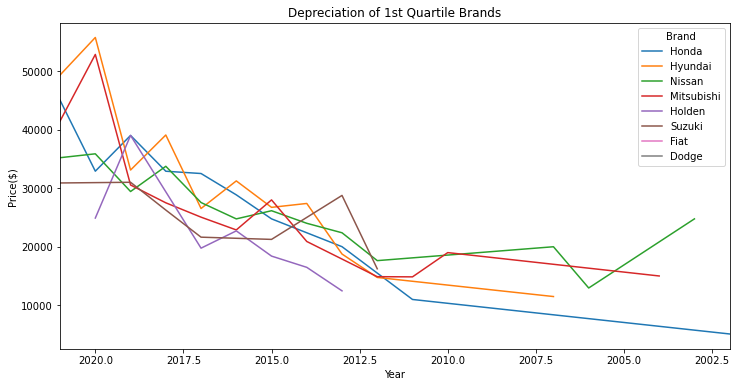

In [29]:
#Depreciation 1st Quartile
df=salesdata[salesdata['Brand'].isin(brand_1)]
plt.figure(figsize=(12,6))
plt.title('Depreciation of 1st Quartile Brands')
plt.xlim(df['Year'].max(),df['Year'].min())
sns.lineplot(x='Year',y='Price($)',hue='Brand',data=df,estimator='mean',ci=None)

<AxesSubplot:title={'center':'Depreciation of 2nd Quartile Brands'}, xlabel='Year', ylabel='Price($)'>

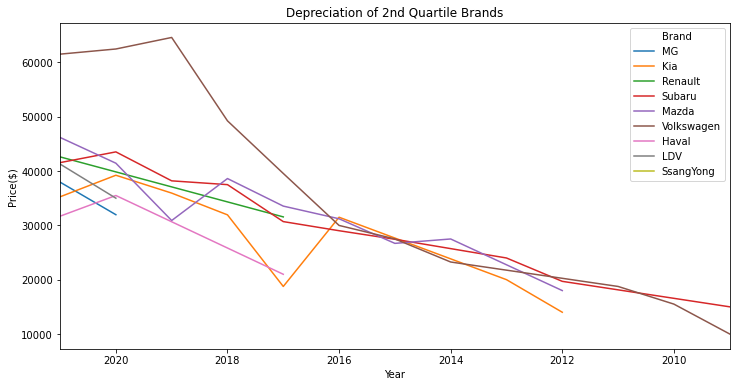

In [30]:
#Depreciation in 2nd Quartile
df=salesdata[salesdata['Brand'].isin(brand_2)]
plt.figure(figsize=(12,6))
plt.title('Depreciation of 2nd Quartile Brands')
plt.xlim(df['Year'].max(),df['Year'].min())
sns.lineplot(x='Year',y='Price($)',hue='Brand',data=df,estimator='mean',ci=None)

<AxesSubplot:title={'center':'Depreciation of 3rd Quartile Brands'}, xlabel='Year', ylabel='Price($)'>

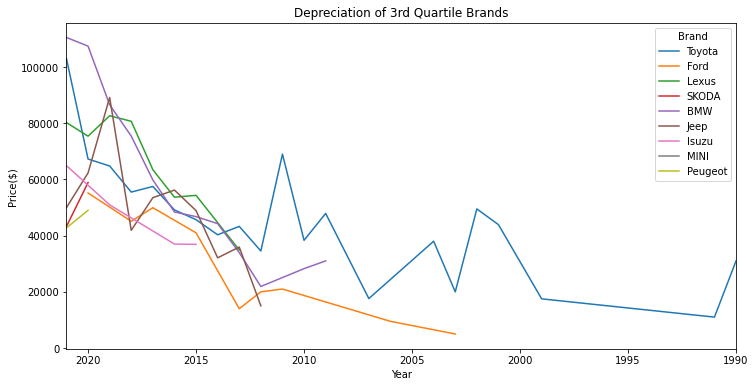

In [31]:
#Depreciation in 3rd Quartile
df=salesdata[salesdata['Brand'].isin(brand_3)]
plt.figure(figsize=(12,6))
plt.title('Depreciation of 3rd Quartile Brands')
plt.xlim(df['Year'].max(),df['Year'].min())
sns.lineplot(x='Year',y='Price($)',hue='Brand',data=df,estimator='mean',ci=None)

<AxesSubplot:title={'center':'Depreciation of 4th Quartile Brands'}, xlabel='Year', ylabel='Price($)'>

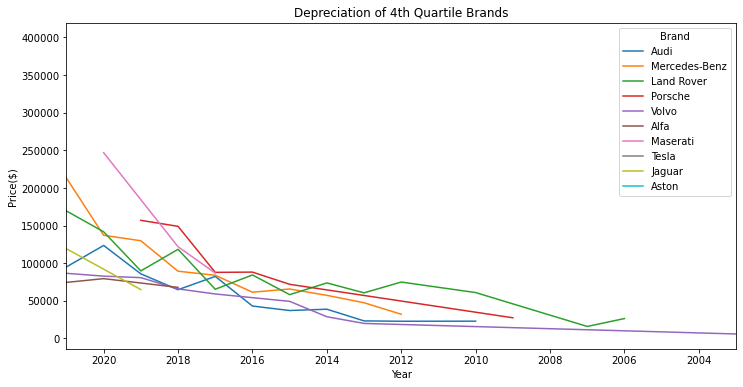

In [32]:
#Depreciation in 4th Quartile
df=salesdata[salesdata['Brand'].isin(brand_4)]
plt.figure(figsize=(12,6))
plt.title('Depreciation of 4th Quartile Brands')
plt.xlim(df['Year'].max(),df['Year'].min())
sns.lineplot(x='Year',y='Price($)',hue='Brand',data=df,estimator='mean',ci=None)